<h1 id="tocheading">Sumário</h1>
<div id="toc"></div>

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

# Chamadas de Emergência do 911 🚑

Neste projeto, vamos analisar dados de ligações para emergência (USA), mais conhecido como 911. A fonte das informações são do 
[Kaggle](https://www.kaggle.com/mchirico/montcoalert).

Os dados contêm as seguintes características para cada ligação:

* lat : Variável string, Latitude
* lng: Variável string, Longitude
* desc: Variável string, Description of the Emergency Call (Descrição da chamada)
* zip: Variável string, Zipcode (Código postal)
* title: Variável string, Title (Título)
* timeStamp: Variável string, YYYY-MM-DD HH:MM:SS (Tempo dia e hora)
* twp: Variável string, Township (Uma localização maior que uma vila e menor que uma cidade)
* addr: Variável string, Address (Endereço)
* e: Variável string, Variável Dummy (sempre 1)


## Dados e Preparação

In [2]:
# bibliotecas de matematica e manipulacao de dados
import numpy as np
import pandas as pd

In [3]:
#bibliotecas de visualização
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Vamos carregar os dados em formato CSV que está disponível localmente.

In [4]:
df = pd.read_csv("911.csv") #lendo os dados

### Informações sobre os dados

In [5]:
df.info() #método para obter informacao sobre o banco de dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [6]:
df.head() #visualisando o cabeçalho

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


Vemos que o banco de dados possui 9 variáveis com 99429 observações e 3 são variáveis com missings. 

Formulamos algumas questões no banco, para ter melhores insights dos dados.

1. Quais são os 5 códigos postais com mais chamadas do 911?

2. Quais são as 5 towncities com mais chamadas do 911?

3. Quantos títulos estão em `title`?

4. Qual é o motivo mais comum para ligações?

5. O número de chamadas mudam de acordo com o dia da semana e motivo?  

6. Os meses influenciam no número de chamadas? Qual o mês e motivo com maior contagem? Qual dia e motivo com maior contagem?

7. Como é o comportamento das ocorrências ao longo do ano?


1. Quais são os 5 códigos postais com mais chamadas do 911?

In [7]:
pd.DataFrame(df["zip"].value_counts().head(5)) 

,zip
19401.0,6979
19464.0,6643
19403.0,4854
19446.0,4748
19406.0,3174


**16401.0** é código postal com mais ligações do 911! 

2. Quais são as 5 towncity com mais chamadas do 911?

In [8]:
pd.DataFrame(df["twp"].value_counts().head(5))

,twp
LOWER MERION,8443
ABINGTON,5977
NORRISTOWN,5890
UPPER MERION,5227
CHELTENHAM,4575


A township que mais recebe chamadas é **Lower Merion**.

3. Quantos títulos estão em `title`?

In [9]:
df["title"].nunique()

110

Existem um total de 110 motivos únicos para chamada no 911.

## Criando Novas Características

Primeiro, vemos que a variável `title` possui o motivo da ligação de forma extensa, mas desejamos encurtar essa informação.
Criamos uma nova variável chamada `reason`, contendo somente a sigla geral do motivo.

In [10]:
df["Reason"] = df["title"].apply(lambda x: x.split(":")[0]) #tomando somente a sigla do motivo

In [11]:
df.Reason

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: Reason, Length: 99492, dtype: object

4. Qual é o motivo mais comum de razões para ligações?

In [12]:
df["Reason"].value_counts().head(1)

EMS    48877
Name: Reason, dtype: int64

A motivo de chamada é EMS, ou seja, essa sigla representa "contusões (BACKPAIN/INJURY)". 

Vamos visualisar as contagens de cada motivo:

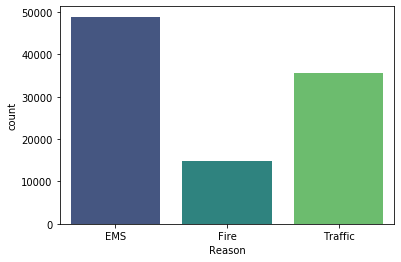

In [13]:
sns.countplot(x = "Reason", palette = "viridis", data = df)

Com quase 49 mil chamadas, o motivo **EMS** (ocorrências de lesões) vem em primeiro lugar, enquanto, 36 mil chamadas foram feitas para o motivo **Traffic** (ocorrências de tráfego)
e 15 mil ligações para o motivo **Fire** (ocorrências de incêndios). 

## Informações sobre Tempo (Data e Hora) das Chamadas.

A variável `timeStamp` possui as informações sobre data e hora das chamadas feitas. Vamos usá-la para descobrir alguns fatos relacionados à tempo.

In [14]:
# transformando o tipo variavel de string p/ o tipo DateTime
df["timeStamp"] = pd.to_datetime(df["timeStamp"])
#df["timeStamp"].iloc[0].hour

# Criando novas características baseadas no tempo

# dicionário para mapear os dias da semana
dmap = {0:"Mon",1:"Tue",2:"Wed",3:"Thu",4:"Fri",5:"Sat",6:"Sun"}

# hora da chamada
df["Hour"] = df["timeStamp"].apply(lambda x: x.hour)
# mes da chamada
df["Month"] = df["timeStamp"].apply(lambda x: x.month)
# dia da semana da chamada
df["Day Of Week"] = df["timeStamp"].apply(lambda x: x.dayofweek)
df["Day Of Week"] = df["Day Of Week"].map(dmap) # mapeando

### Relação entre Motivo e Dia da Semana das Chamadas

Outra pergunta:

5. O número de chamadas mudam de acordo com o dia da semana e motivo? Qual dia e motivo com maior contagem? 

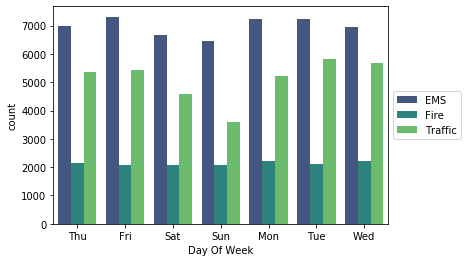

In [15]:
sns.countplot(x = "Day Of Week", hue = "Reason", palette = "viridis", data = df)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

O gráfico acima nos fornece muita informação sobre a relação dos dias da semana com o número de chamadas feitas:

* Já vimos que o número de chamadas para o motivo *EMS* (lesões) são os mais comuns. Mas também, notamos que pelo gráfico acima, nos fins de semana, há uma diminuição nas chamadas (o que é bem razoável).

* As chamadas para o motivo *Traffic* (tráfego), vem em segundo lugar no número de chamadas. Veja o comportamento similar ao *EMS* nos fins de semana.

* As ocorrências de incêndio é o motivo com menos ligações. E o comportamento diário parece ser constante. 


Respondendo a pergunta 5, sim! Mas somente para os motivos: EMS (lesões) e Traffic (tráfego) que possuem menores contagens 
de chamadas nos fins de semana. Além disso, às sextas têm a maior contagem de chamadas para pessoas que sofrem lesões.

### Relação entre Motivo e Mês das Chamadas

6. Os meses influenciam no número de chamadas? Qual o mês e motivo com maior contagem?

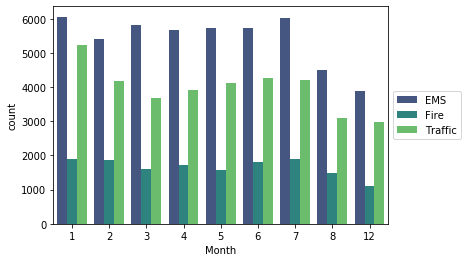

In [16]:
sns.countplot(x = "Month", hue = "Reason", palette = "viridis", data = df)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

Alguns meses, não aparecem contagens (10 e 11). Isso, porque as não ouve ocorrências de nenhum dos motivos.

O gráfico acima nos fornece algumas informações:

* Ocorrências de lesões e tráfego possuem comportamente similar: ao começo do ano há o pico de chamadas e no meio, também, possuem altas contagens.

* Ocorrências de incêndio possui pouca variabilidade (mais estáticos) que outros motivos e possui um patamar mais baixo de contagem.

Então, para pergunta 6, podemos dizer que a depender do mês, o número de chamadas possui variação. E o mês e motivo com maior contagem é janeiro, novamente, com o motivo.

## Ocorrências Mensais

Observando que cruzando mês e motivo das chamadas, algumas contagens foram nulas. Então, vamos considerar apenas os meses.

In [17]:
# agrupando por mês
byMonth = df.groupby("Month").count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day Of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


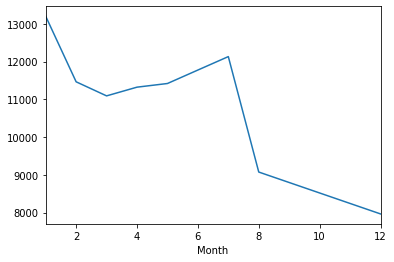

In [18]:
# Um outra forma de visualizar as contagens mensais
byMonth["twp"].plot()

O pico de ocorrências está em janeiro, logo decresce até março e volta crescer até julho. Daí cai drasticamente até o dezembro.

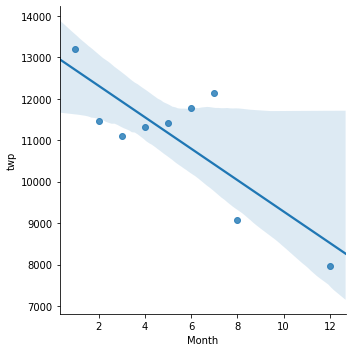

In [19]:
# aplicando um ajuste de regressão linear às contagens
sns.lmplot(x = "Month", y = "twp", data = byMonth.reset_index()) # reset_index() cria uma nova coluna chamada Month 

Fazendo um regressão linear simples, podemos ver essa tendência de descrescimento ao longo do ano de forma geral. Que responde a pergunta 7:

7. Como é o comportamento das ocorrências ao longo do ano?

## Ocorrências Diárias

Analisamos de forma diária o comportamento do número de ocorrências do 911.

In [20]:
# Vamos criar uma nova coluna chamada "Date" que contém a data da coluna timeStamp
df["Date"] = df["timeStamp"].apply(lambda t: t.date())

In [21]:
# agregando os dados por data
byDate = df.groupby("Date").count()["twp"]
byDate

Date
2015-12-10    115
2015-12-11    395
2015-12-12    403
2015-12-13    319
2015-12-14    446
             ... 
2016-08-20    328
2016-08-21    357
2016-08-22    388
2016-08-23    439
2016-08-24    132
Name: twp, Length: 259, dtype: int64

Os dias em que os dados foram coletados vão de 10/12/2015 até 24/08/2016.

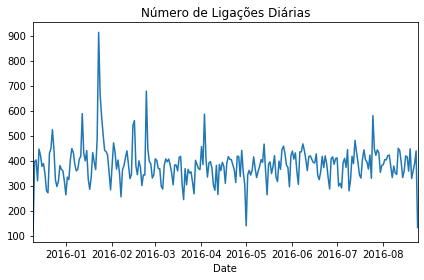

In [22]:
byDate.plot()
plt.title("Número de Ligações Diárias")
plt.tight_layout()

O interessante é ver os picos e vales:

* Nesse caso, o dia com maior número de ligações foi no mês de janeiro. 

* Alguns picos menores em fevereiro e abril.

* O dia com menor número de ocorrências, foi em abril

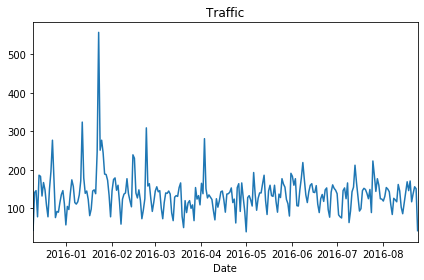

In [23]:
#fazendo o mesmo plot com diferentes motivos

#motivo = Traffic
df[df["Reason"] == "Traffic"].groupby("Date").count()["twp"].plot()
plt.title("Traffic")
plt.tight_layout()

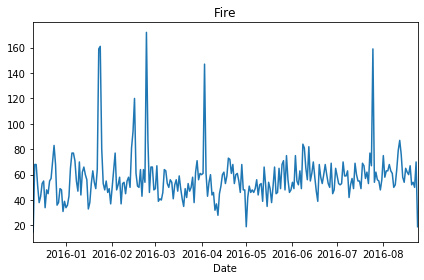

In [24]:
#motivo = Fire
df[df["Reason"] == "Fire"].groupby("Date").count()["twp"].plot()
plt.title("Fire")
plt.tight_layout()

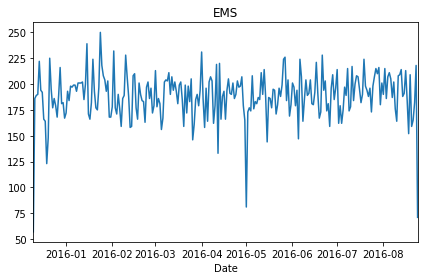

In [25]:
#motivo = EMS
df[df["Reason"] == "EMS"].groupby("Date").count()["twp"].plot()
plt.title("EMS")
plt.tight_layout()

## Dia X Hora

Agora, vamos criar uma matriz com colunas "Hour" e linhas "Day of Week" e os valores da matriz serão as contagens 
das combinações.

In [26]:
# combinando groupby com unstack
dayHour = df.groupby(by=['Day Of Week','Hour']).count()["Reason"].unstack()
dayHour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day Of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


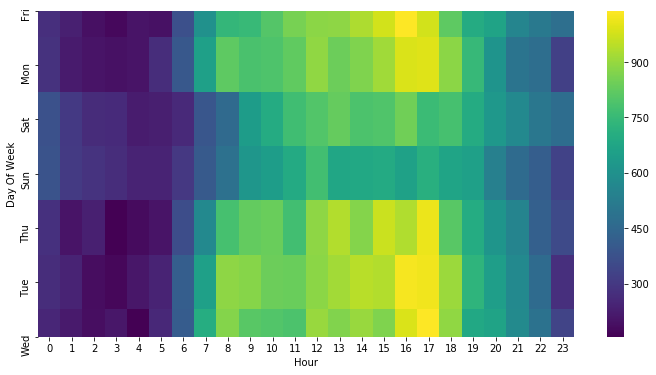

In [27]:
# criando um heatmap da matriz 
plt.figure(figsize=(12,6))
sns.heatmap(dayHour, cmap='viridis')

O gráfico acima se chama "Heat Map". Basicamente, podemos analisar de maneira gráfica a combinações de hora e dia da semana. 
Por exemplo:
    
* Das 8h às 18 e para, principalmente, os dias da semana, são mais "intensos" em relação ao número de ocorrências.    

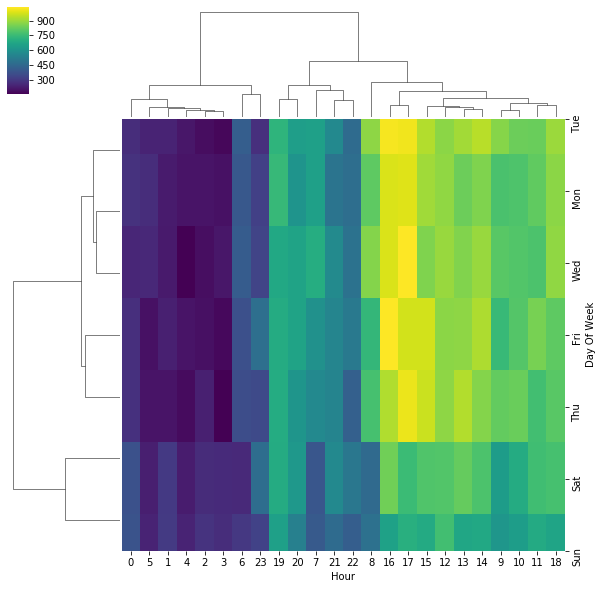

In [28]:
# criando um clustermap
sns.clustermap(dayHour, cmap = "viridis")

O clustermap é similar ao heatmap. Porém há um esquema de agrupamento hieráquico. Por exemplo:
    
* O comportamento de quinta e sexta são similares.

* 16h e 17h horas também possuem contagens similares.

## Dia X Mês

In [29]:
# mesmo processo, mas com a variável Month
dayMonth = df.groupby(by = ["Day Of Week","Month"]).count()["Reason"].unstack()

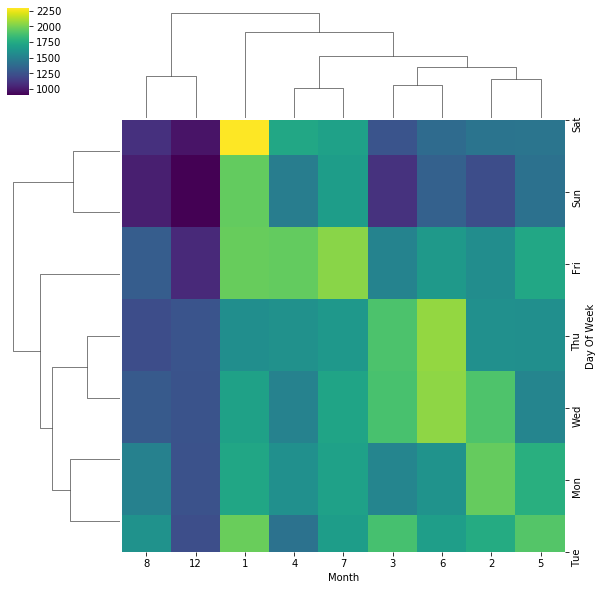

In [30]:
sns.clustermap(dayMonth, cmap = "viridis")

Notamos uma informação diferente, os sábados de janeiro foram os que tiveram mais chamadas, seguido pelos domingos e sextas 
do mesmo mês.

## Conclusões

Vamos recapitular as informações relevantes dos dados de "Chamadas de Emergência do 911":

* Vimos que o código postal (zip) com mais chamadas foi `16401.0`.

* A township (uma cidade um pouco menor) que mais recebe chamadas é **Lower Merion**.

* Existem 3 diferentes motivos da chamada (lesões, ocorrências de tráfego e incêndios). E há 110 motivos específicos para as chamadas.

* O motivo mais comum é o relacionado à lesões (EMS) com quase 49 mil chamadas, enquanto, 36 mil chamadas foram feitas para o motivo Traffic (ocorrências de tráfego) e 15 mil ligações para o motivo Fire (ocorrências de incêndios).

Além disso, analisamos informações relacionadas ao tempo (hora, dia da semana, mês).

* Os dias em que os dados foram coletados vão de 10/12/2015 até 24/08/2016.

* O número de chamadas muda de acordo com o motivo e dia da semana. Mas somente para os motivos: EMS (lesões) e Traffic (tráfego) que possuem menores contagens de chamadas nos fins de semana. Além disso, às sextas há a maior contagem de chamadas para pessoas que sofrem lesões.

* O número de chamadas também muda de acordo com motivo e mês. A depender do mês, o número de chamadas possui variação. E o mês e motivo com maior contagem é janeiro, novamente, com o motivo.

* Notamos uma tendência de descrescimento ao longo do ano de forma geral das contagens de chamadas.

* Janeiro e Abril têm a maior e menor contagem, respectivamente.

* Das 8h às 18 e para, principalmente, os dias da semana, são mais "intensos" em relação ao número de ocorrências.

* Notamos uma informação diferente, os sábados de janeiro foram os que tiveram mais chamadas, seguido pelos domingos e sextas do mesmo mês.